In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                           precision_recall_curve, auc, precision_score, recall_score, f1_score)

# Imbalanced learning techniques
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


# Read and Display Data

In [2]:
# Load the credit card fraud dataset
# Download from: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
df = pd.read_csv('creditcard.csv')

# Basic dataset information
print("=== CREDIT CARD FRAUD DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")
print(f"\nDataset size: {df.shape[0]:,} transactions")
print(f"Number of features: {df.shape[1]-1} (excluding target)")

# Display first few rows
print("\n=== FIRST FEW ROWS ===")
df.head()

=== CREDIT CARD FRAUD DATASET OVERVIEW ===
Dataset shape: (284807, 31)
Features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Dataset size: 284,807 transactions
Number of features: 30 (excluding target)

=== FIRST FEW ROWS ===


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Statistics of Data

This portion of the code will show the unbalanced dataset and some statistics and plots about the data

In [3]:
# Analyze class distribution
print("=== CLASS DISTRIBUTION ANALYSIS ===")

# Count values
class_counts = df['Class'].value_counts().sort_index()
print("Class counts:")
print(f"Normal transactions (Class 0): {class_counts[0]:,}")
print(f"Fraudulent transactions (Class 1): {class_counts[1]:,}")

# Calculate percentages and imbalance ratio
normal_pct = (class_counts[0] / len(df)) * 100
fraud_pct = (class_counts[1] / len(df)) * 100
imbalance_ratio = class_counts[0] / class_counts[1]

print(f"\nClass distribution:")
print(f"Normal: {normal_pct:.3f}%")
print(f"Fraud: {fraud_pct:.3f}%")
print(f"\nImbalance ratio: {imbalance_ratio:.0f}:1")
print("This means for every 1 fraudulent transaction, there are {:.0f} normal transactions".format(imbalance_ratio))

=== CLASS DISTRIBUTION ANALYSIS ===
Class counts:
Normal transactions (Class 0): 284,315
Fraudulent transactions (Class 1): 492

Class distribution:
Normal: 99.827%
Fraud: 0.173%

Imbalance ratio: 578:1
This means for every 1 fraudulent transaction, there are 578 normal transactions


Normal transactions: 284,315
Fraud transactions: 492


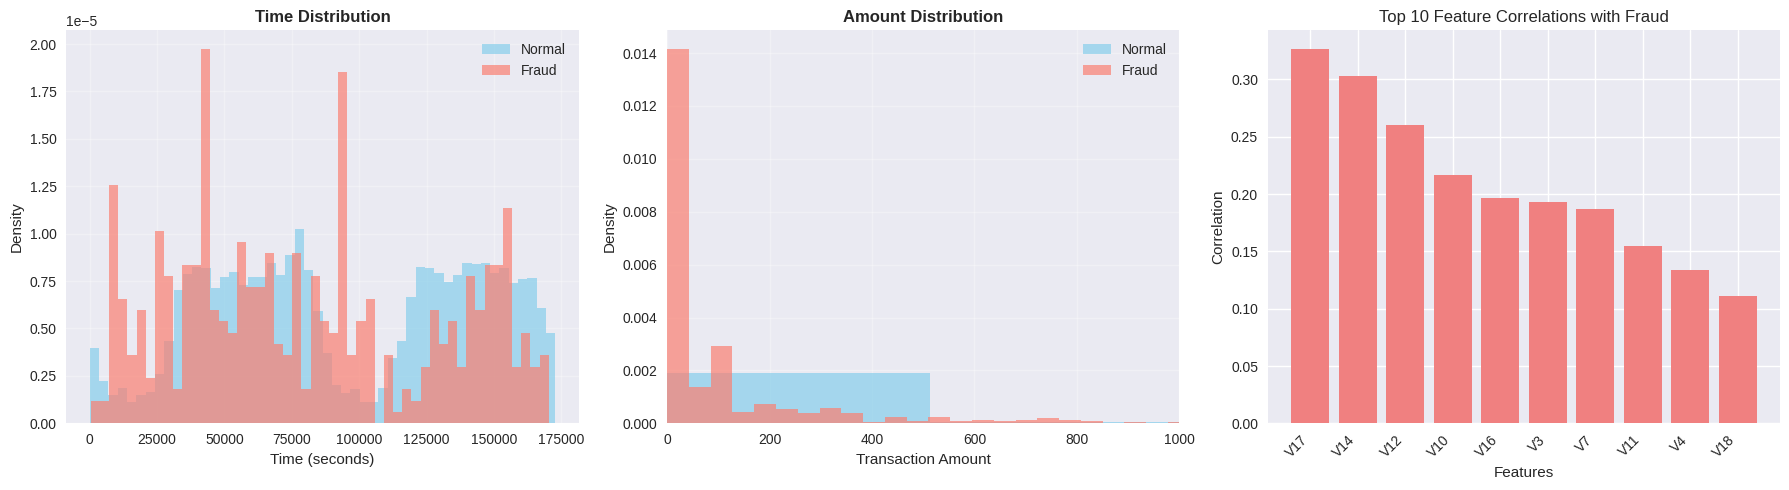

In [4]:
# Separate fraud and normal transactions
fraud_data = df[df['Class'] == 1]
normal_data = df[df['Class'] == 0]

print(f"Normal transactions: {len(normal_data):,}")
print(f"Fraud transactions: {len(fraud_data):,}")

# 1. Plot Time and Amount distributions (original features)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Time distributions
ax1 = axes[0]
ax1.hist(normal_data['Time'], bins=50, alpha=0.7, label='Normal', color='skyblue', density=True)
ax1.hist(fraud_data['Time'], bins=50, alpha=0.7, label='Fraud', color='salmon', density=True)
ax1.set_title('Time Distribution', fontweight='bold')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Amount distributions
ax2 = axes[1]
ax2.hist(normal_data['Amount'], bins=50, alpha=0.7, label='Normal', color='skyblue', density=True)
ax2.hist(fraud_data['Amount'], bins=50, alpha=0.7, label='Fraud', color='salmon', density=True)
ax2.set_title('Amount Distribution', fontweight='bold')
ax2.set_xlabel('Transaction Amount')
ax2.set_ylabel('Density')
ax2.legend()
ax2.set_xlim(0, 1000)  # Limit for better visualization
ax2.grid(True, alpha=0.3)

# Correlation with fraud class
correlations = df.corr()['Class'].abs().sort_values(ascending=False)
feature_correlations = correlations.drop('Class').head(10)
axes[2].bar(range(len(feature_correlations)), feature_correlations.values, color='lightcoral')
axes[2].set_title('Top 10 Feature Correlations with Fraud')
axes[2].set_xlabel('Features')
axes[2].set_ylabel('Correlation')
axes[2].set_xticks(range(len(feature_correlations)))
axes[2].set_xticklabels(feature_correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


=== ALL PCA COMPONENTS (V1-V28) DISTRIBUTIONS ===
Correlation cutoffs for color coding:
🔴 Red (High): Correlation > 0.3
🟠 Orange (Medium): Correlation 0.1 - 0.3
⚪ Gray (Low): Correlation ≤ 0.1


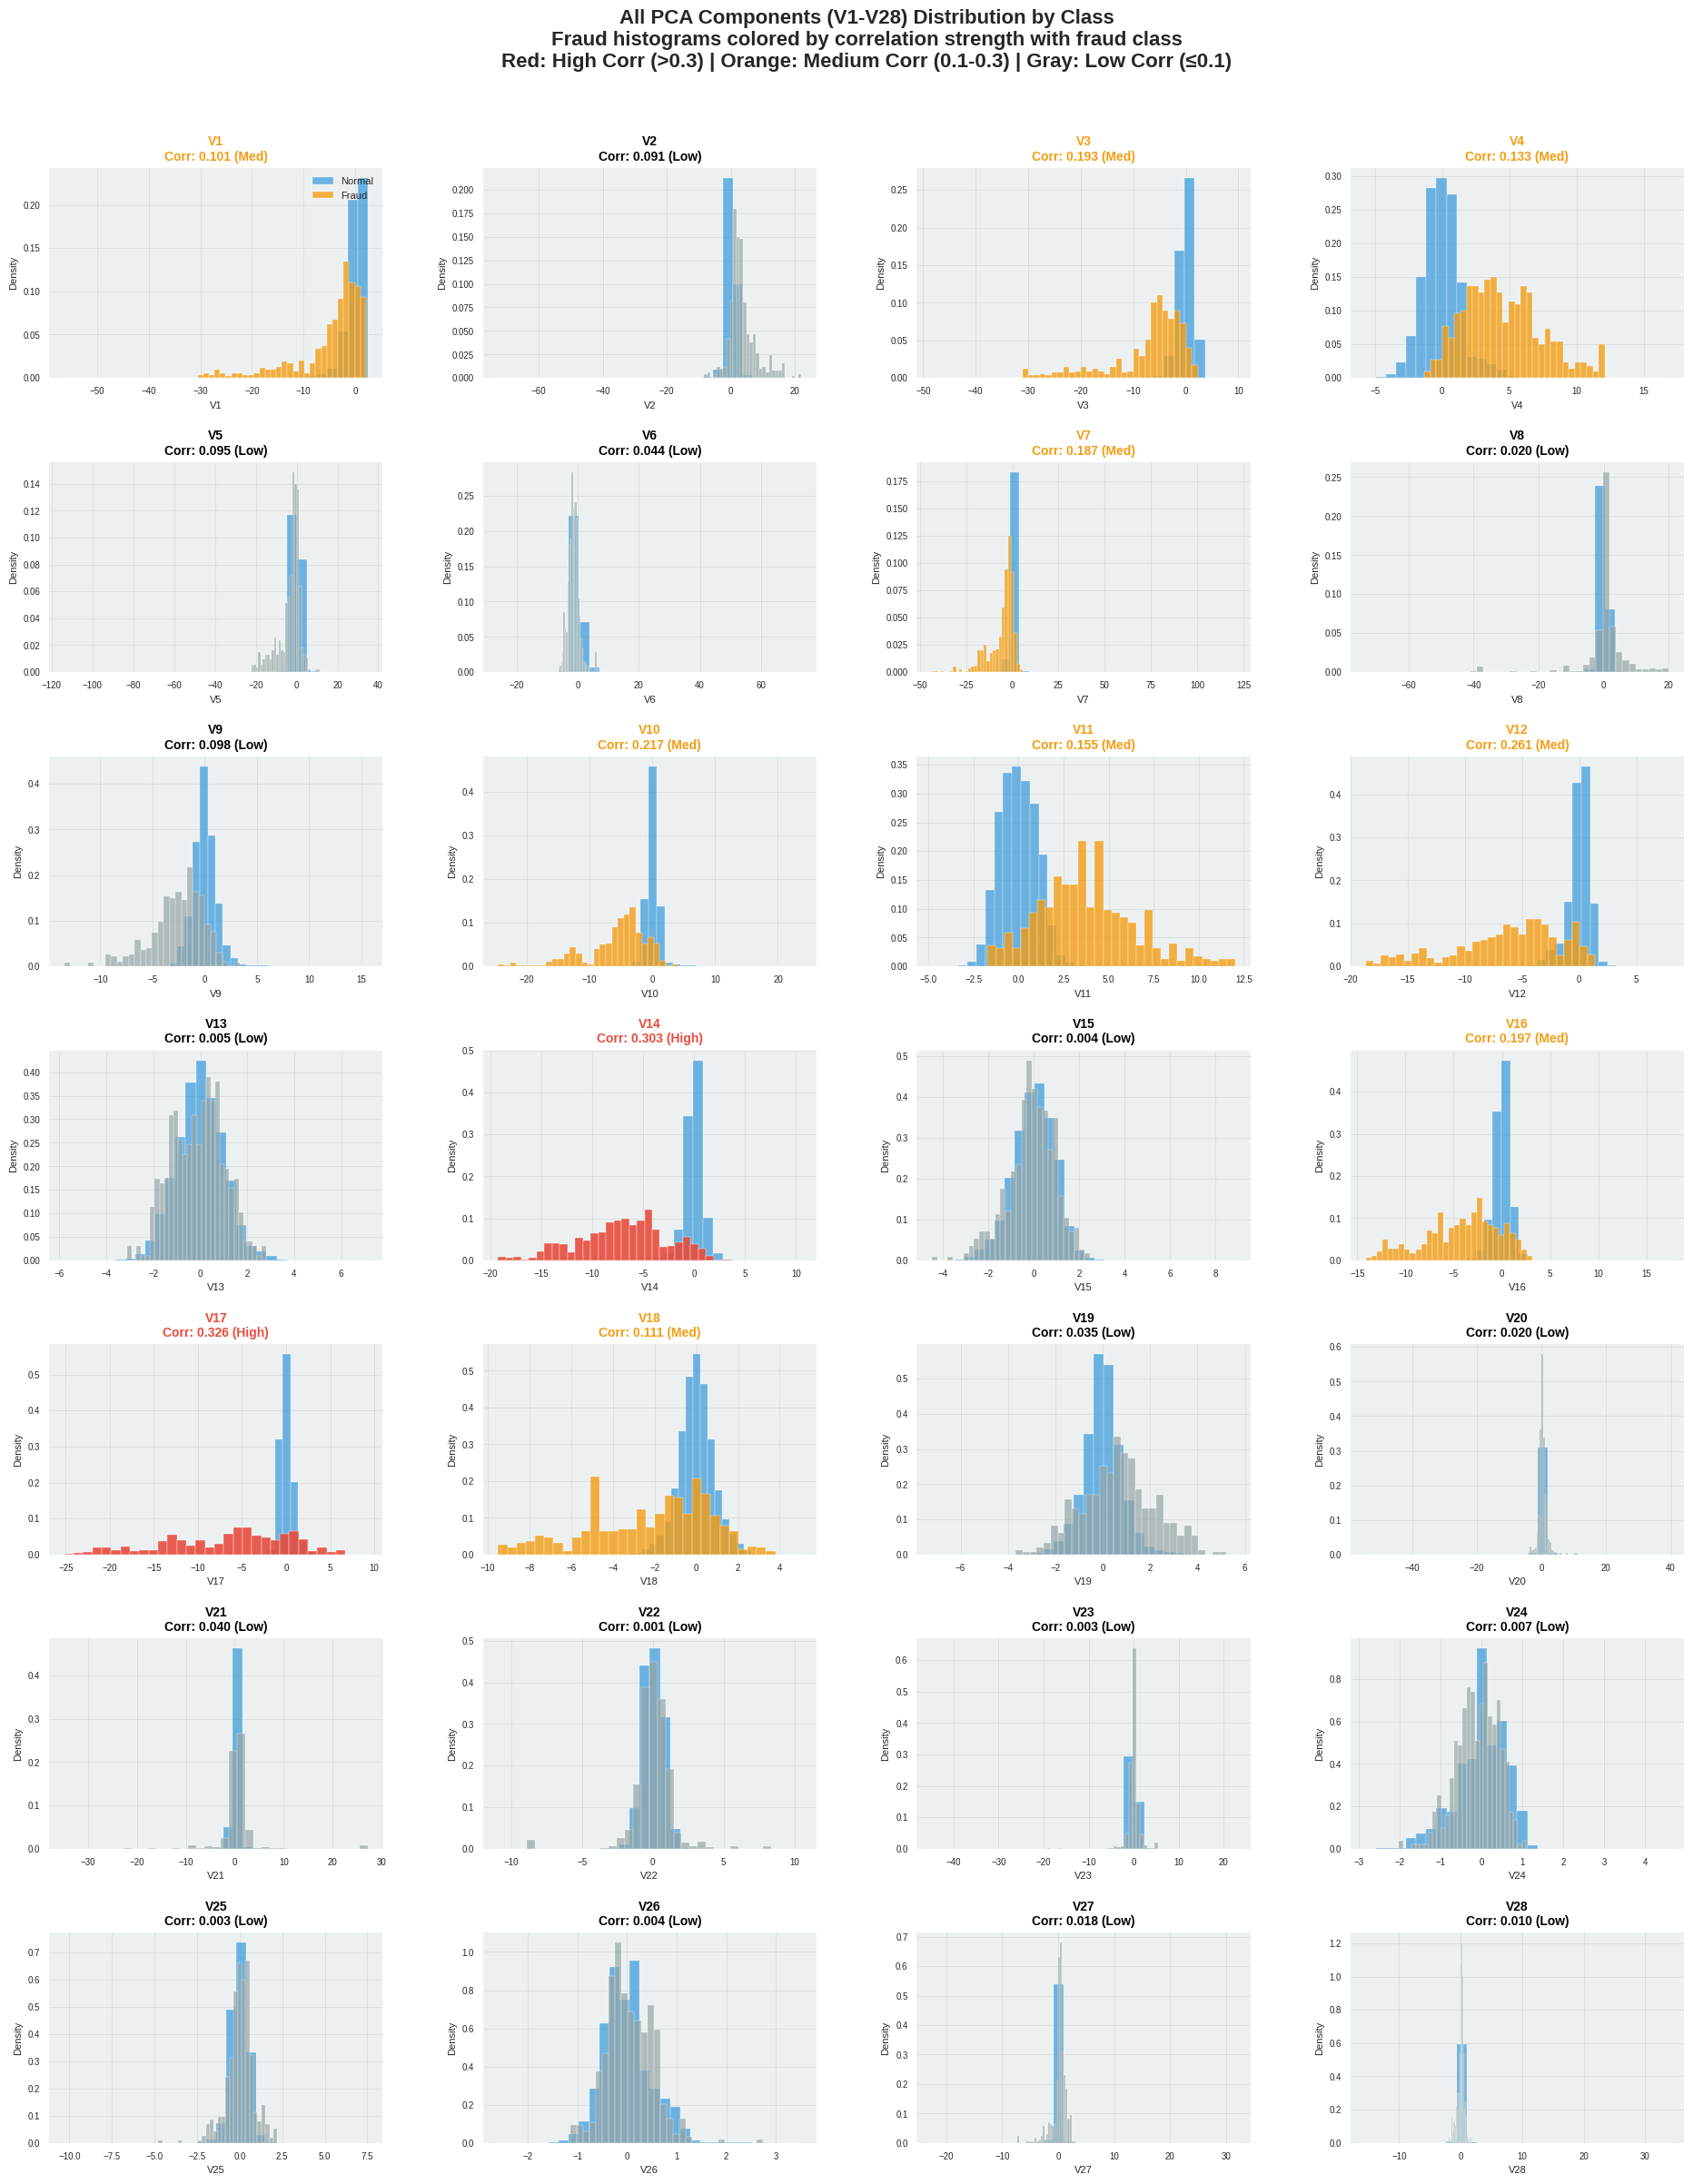


=== PCA COMPONENTS CORRELATION SUMMARY ===
🔴 High correlation PCA components (>0.3): 2/28
🟠 Medium correlation PCA components (0.1-0.3): 9/28
⚪ Low correlation PCA components (≤0.1): 17/28

Most predictive PCA components: ['V14', 'V17']


In [5]:
# 2. Comprehensive PCA features distribution (V1-V28) with consistent colors
print("\n=== ALL PCA COMPONENTS (V1-V28) DISTRIBUTIONS ===")
print("Correlation cutoffs for color coding:")
print("🔴 Red (High): Correlation > 0.3")
print("🟠 Orange (Medium): Correlation 0.1 - 0.3") 
print("⚪ Gray (Low): Correlation ≤ 0.1")

# Create a large subplot grid for all V features
fig, axes = plt.subplots(7, 4, figsize=(20, 25))
fig.patch.set_facecolor('white')
axes = axes.ravel()

# Calculate correlations for color coding
all_correlations = df.corr()['Class'].abs()

# Define the PCA feature list
v_features = [f'V{i}' for i in range(1, 29)]

for i, feature in enumerate(v_features):
    ax = axes[i]
    
    # Get correlation for this feature
    corr_value = all_correlations[feature]
    
    # Determine fraud color based on correlation strength
    if corr_value > 0.3:
        fraud_color = '#e74c3c'  # Red for high correlation
        fraud_alpha = 0.9
        corr_label = "High"
    elif corr_value > 0.1:
        fraud_color = '#f39c12'  # Orange for medium correlation
        fraud_alpha = 0.8
        corr_label = "Med"
    else:
        fraud_color = '#95a5a6'  # Gray for low correlation
        fraud_alpha = 0.7
        corr_label = "Low"
    
    # Plot histograms with consistent colors
    ax.hist(normal_data[feature], bins=30, alpha=0.7, label='Normal', 
            color='#3498db', density=True, edgecolor='white', linewidth=0.3)  # Blue for normal
    ax.hist(fraud_data[feature], bins=30, alpha=fraud_alpha, label='Fraud', 
            color=fraud_color, density=True, edgecolor='white', linewidth=0.3)
    
    # Set title with correlation info and color coding
    title_color = fraud_color if corr_value > 0.1 else 'black'
    ax.set_title(f'{feature}\nCorr: {corr_value:.3f} ({corr_label})', fontsize=10, fontweight='bold', 
                color=title_color)
    ax.set_xlabel(feature, fontsize=8)
    ax.set_ylabel('Density', fontsize=8)
    
    # Add legend only to first subplot
    if i == 0:
        ax.legend(fontsize=8, loc='upper right')
    
    ax.grid(True, alpha=0.2, color='gray', linestyle='-', linewidth=0.5)
    ax.set_facecolor('#ecf0f1')  # Light gray background
    ax.tick_params(labelsize=7)

# Remove empty subplots
for i in range(len(v_features), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('All PCA Components (V1-V28) Distribution by Class\nFraud histograms colored by correlation strength with fraud class\n' + 
             'Red: High Corr (>0.3) | Orange: Medium Corr (0.1-0.3) | Gray: Low Corr (≤0.1)', 
             fontsize=16, fontweight='bold', y=0.99)

# Adjust spacing to give more room for the title
plt.subplots_adjust(top=0.92, bottom=0.05, left=0.05, right=0.95, hspace=0.4, wspace=0.3)
plt.show()

# Print summary of correlation distribution
print(f"\n=== PCA COMPONENTS CORRELATION SUMMARY ===")
high_pca = sum(1 for feature in v_features if all_correlations[feature] > 0.3)
med_pca = sum(1 for feature in v_features if 0.1 < all_correlations[feature] <= 0.3)
low_pca = sum(1 for feature in v_features if all_correlations[feature] <= 0.1)

print(f"🔴 High correlation PCA components (>0.3): {high_pca}/{len(v_features)}")
print(f"🟠 Medium correlation PCA components (0.1-0.3): {med_pca}/{len(v_features)}")
print(f"⚪ Low correlation PCA components (≤0.1): {low_pca}/{len(v_features)}")

if high_pca > 0:
    high_features = [f for f in v_features if all_correlations[f] > 0.3]
    print(f"\nMost predictive PCA components: {high_features}")

## Random Sampling

In [6]:
# Random Sampling Comparison: Class Distributions and Feature Analysis
print("=== RANDOM SAMPLING COMPARISON ===")
print("Comparing original data vs random oversampling vs random undersampling")

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Prepare the full dataset
X = df.drop('Class', axis=1)
y = df['Class']

# Apply random oversampling
ros = RandomOverSampler(random_state=42)
X_oversample, y_oversample = ros.fit_resample(X, y)

# Apply random undersampling  
rus = RandomUnderSampler(random_state=42)
X_undersample, y_undersample = rus.fit_resample(X, y)

# Print sampling results
print(f"\n=== SAMPLING RESULTS ===")
print(f"Original dataset: {len(y):,} samples")
print(f"  Normal: {sum(y == 0):,} ({sum(y == 0)/len(y)*100:.1f}%)")
print(f"  Fraud: {sum(y == 1):,} ({sum(y == 1)/len(y)*100:.1f}%)")

print(f"\nRandom Oversampling: {len(y_oversample):,} samples")
print(f"  Normal: {sum(y_oversample == 0):,} ({sum(y_oversample == 0)/len(y_oversample)*100:.1f}%)")
print(f"  Fraud: {sum(y_oversample == 1):,} ({sum(y_oversample == 1)/len(y_oversample)*100:.1f}%)")

print(f"\nRandom Undersampling: {len(y_undersample):,} samples")
print(f"  Normal: {sum(y_undersample == 0):,} ({sum(y_undersample == 0)/len(y_undersample)*100:.1f}%)")
print(f"  Fraud: {sum(y_undersample == 1):,} ({sum(y_undersample == 1)/len(y_undersample)*100:.1f}%)")

=== RANDOM SAMPLING COMPARISON ===
Comparing original data vs random oversampling vs random undersampling

=== SAMPLING RESULTS ===
Original dataset: 284,807 samples
  Normal: 284,315 (99.8%)
  Fraud: 492 (0.2%)

Random Oversampling: 568,630 samples
  Normal: 284,315 (50.0%)
  Fraud: 284,315 (50.0%)

Random Undersampling: 984 samples
  Normal: 492 (50.0%)
  Fraud: 492 (50.0%)



=== CLASS DISTRIBUTION VISUALIZATIONS ===


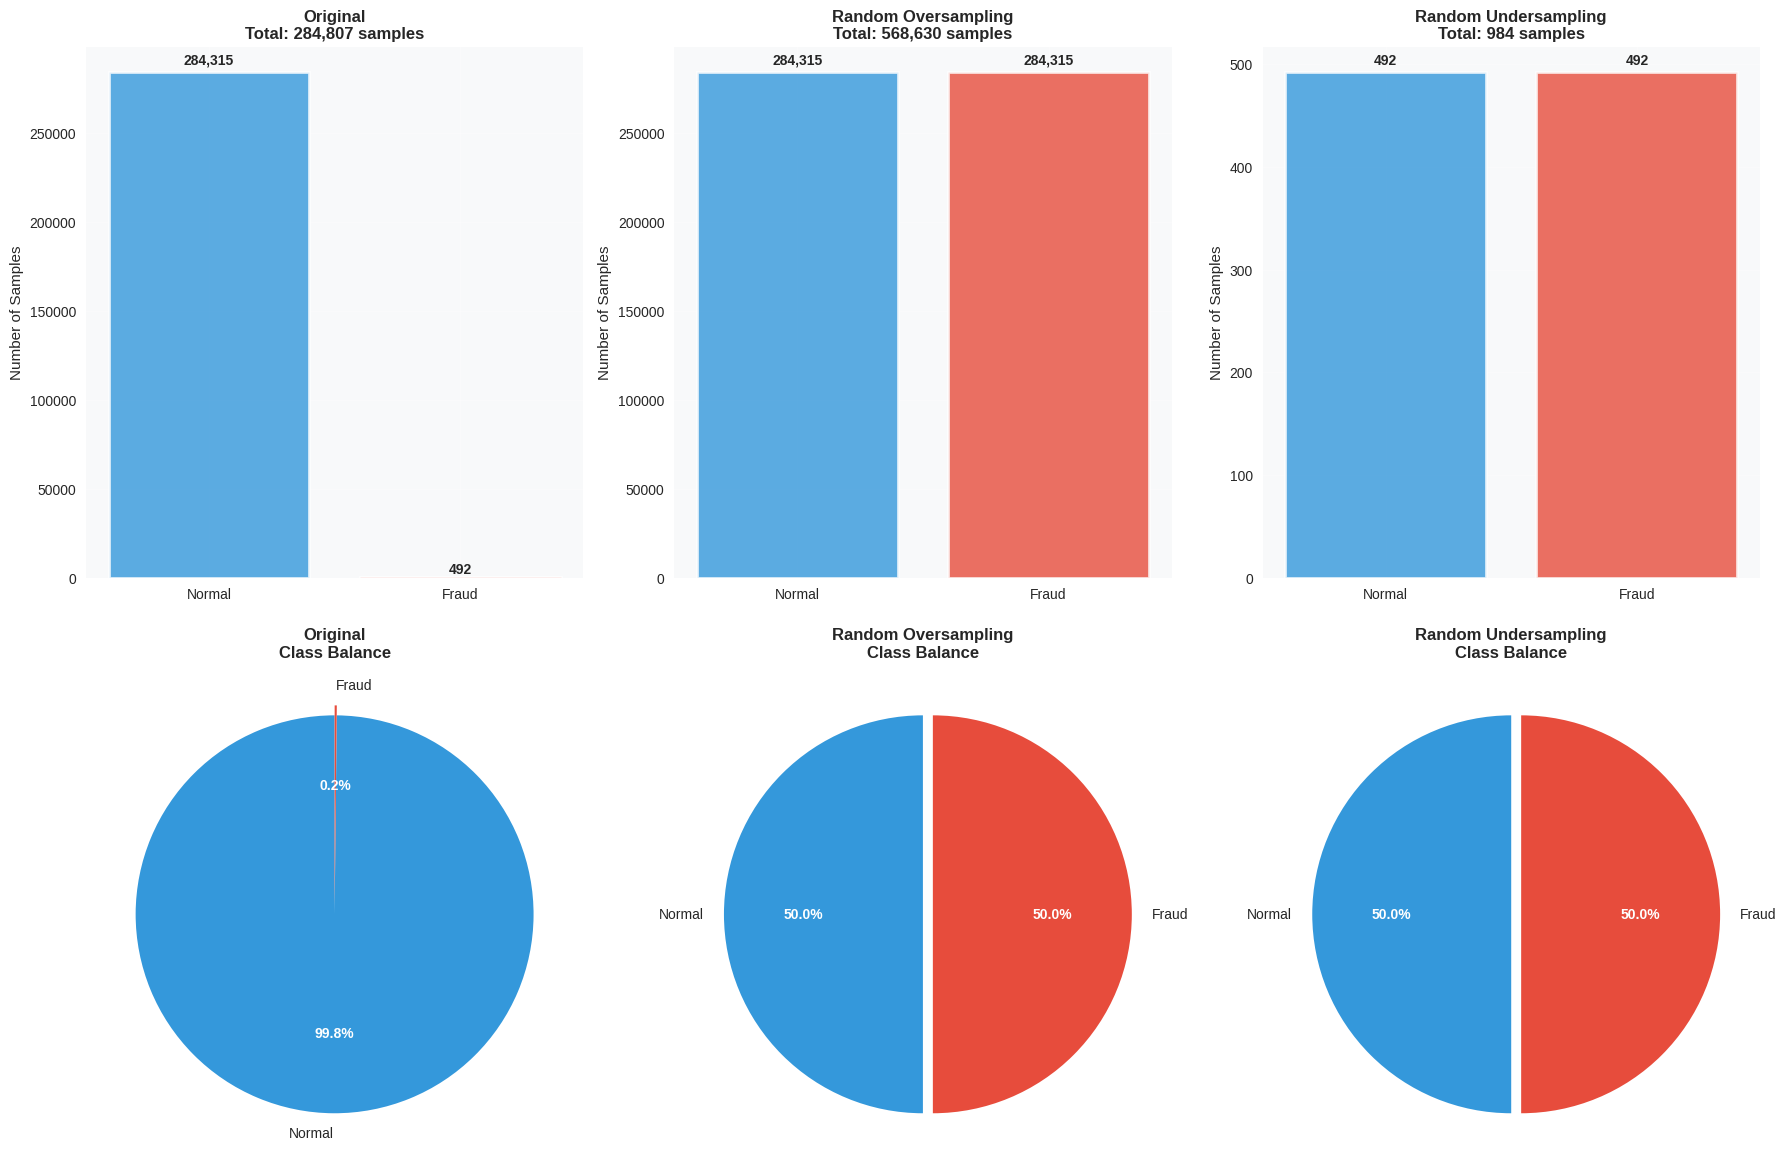


=== BALANCE RATIOS ===
Original: 577.9:1 (Normal:Fraud)
Random Oversampling: 1.0:1 (Normal:Fraud)
Random Undersampling: 1.0:1 (Normal:Fraud)


In [7]:
# 1. Class Distribution Comparison
print("\n=== CLASS DISTRIBUTION VISUALIZATIONS ===")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Prepare data for plotting
datasets = {
    'Original': y,
    'Random Oversampling': y_oversample, 
    'Random Undersampling': y_undersample
}

colors = ['#3498db', '#e74c3c']  # Blue for normal, red for fraud

# Top row: Bar charts showing absolute counts
for idx, (name, y_data) in enumerate(datasets.items()):
    ax = axes[0, idx]
    
    counts = pd.Series(y_data).value_counts().sort_index()
    bars = ax.bar(['Normal', 'Fraud'], [counts[0], counts[1]], 
                  color=colors, alpha=0.8, edgecolor='white', linewidth=2)
    
    ax.set_title(f'{name}\nTotal: {len(y_data):,} samples', fontweight='bold', fontsize=12)
    ax.set_ylabel('Number of Samples')
    
    # Add value labels on bars
    for bar, count in zip(bars, [counts[0], counts[1]]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{count:,}', ha='center', va='bottom', fontweight='bold')
    
    ax.grid(True, alpha=0.3)
    ax.set_facecolor('#f8f9fa')

# Bottom row: Pie charts showing proportions
for idx, (name, y_data) in enumerate(datasets.items()):
    ax = axes[1, idx]
    
    counts = pd.Series(y_data).value_counts().sort_index()
    
    wedges, texts, autotexts = ax.pie([counts[0], counts[1]], 
                                      labels=['Normal', 'Fraud'],
                                      colors=colors,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      explode=(0, 0.05))  # Slightly separate fraud slice
    
    ax.set_title(f'{name}\nClass Balance', fontweight='bold', fontsize=12)
    
    # Make percentage text bold and larger
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

# Print balance ratios
print(f"\n=== BALANCE RATIOS ===")
for name, y_data in datasets.items():
    counts = pd.Series(y_data).value_counts().sort_index()
    ratio = counts[0] / counts[1] if counts[1] > 0 else float('inf')
    print(f"{name}: {ratio:.1f}:1 (Normal:Fraud)")


=== FEATURE DISTRIBUTION ANALYSIS ===


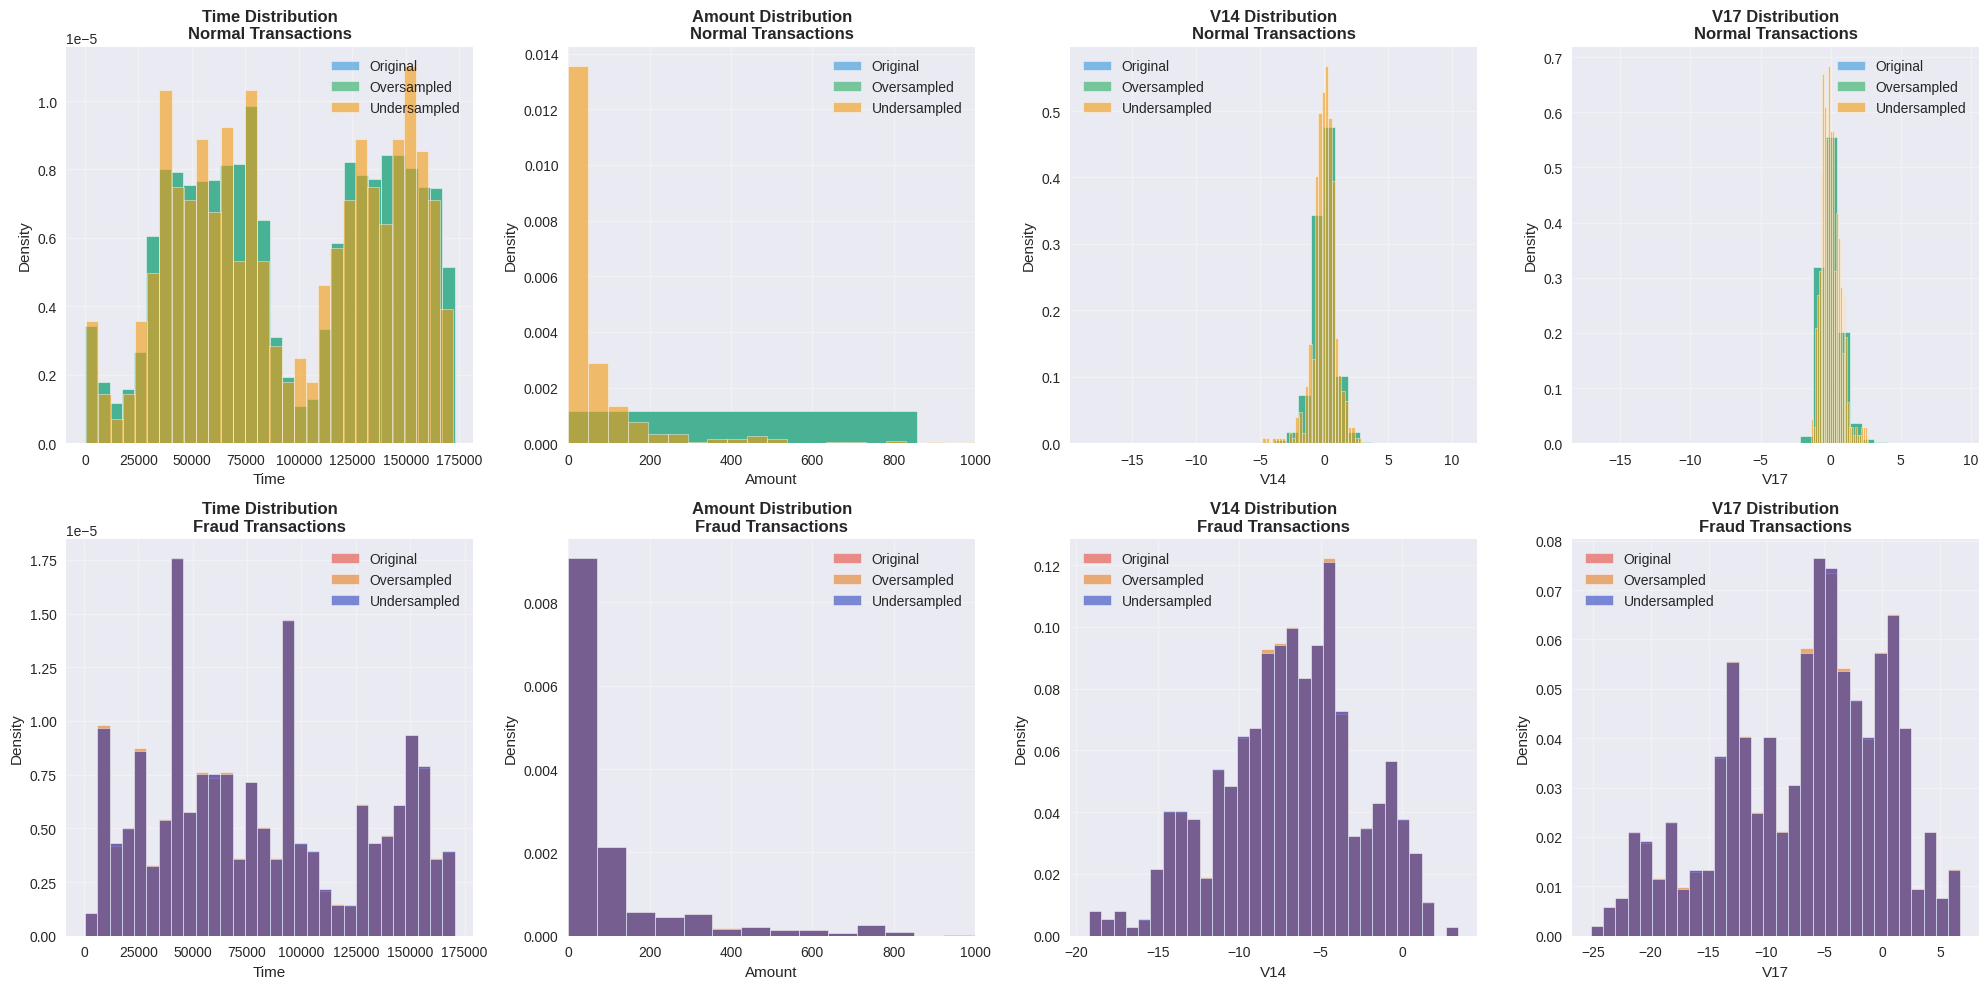

In [8]:
# 2. Feature Distribution Comparisons
print("\n=== FEATURE DISTRIBUTION ANALYSIS ===")

# Create dataframes for easier plotting
df_original = df.copy()
df_original['Source'] = 'Original'

df_oversample = pd.DataFrame(X_oversample, columns=X.columns)
df_oversample['Class'] = y_oversample
df_oversample['Source'] = 'Oversampled'

df_undersample = pd.DataFrame(X_undersample, columns=X.columns)
df_undersample['Class'] = y_undersample
df_undersample['Source'] = 'Undersampled'

# Select key features to analyze
key_features = ['Time', 'Amount', 'V14', 'V17']  # Time, Amount, and top correlated features

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plot feature distributions for Normal transactions (Class 0)
for idx, feature in enumerate(key_features):
    ax = axes[0, idx]
    
    # Plot histograms for normal transactions
    original_normal = df_original[df_original['Class'] == 0][feature]
    oversample_normal = df_oversample[df_oversample['Class'] == 0][feature]
    undersample_normal = df_undersample[df_undersample['Class'] == 0][feature]
    
    ax.hist(original_normal, bins=30, alpha=0.6, label='Original', 
            color='#3498db', density=True, edgecolor='white', linewidth=0.5)
    ax.hist(oversample_normal, bins=30, alpha=0.6, label='Oversampled', 
            color='#27ae60', density=True, edgecolor='white', linewidth=0.5)
    ax.hist(undersample_normal, bins=30, alpha=0.6, label='Undersampled', 
            color='#f39c12', density=True, edgecolor='white', linewidth=0.5)
    
    ax.set_title(f'{feature} Distribution\nNormal Transactions', fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Limit x-axis for Amount for better visualization
    if feature == 'Amount':
        ax.set_xlim(0, 1000)

# Plot feature distributions for Fraud transactions (Class 1)
for idx, feature in enumerate(key_features):
    ax = axes[1, idx]
    
    # Plot histograms for fraud transactions
    original_fraud = df_original[df_original['Class'] == 1][feature]
    oversample_fraud = df_oversample[df_oversample['Class'] == 1][feature]
    undersample_fraud = df_undersample[df_undersample['Class'] == 1][feature]
    
    ax.hist(original_fraud, bins=30, alpha=0.6, label='Original', 
            color='#e74c3c', density=True, edgecolor='white', linewidth=0.5)
    ax.hist(oversample_fraud, bins=30, alpha=0.6, label='Oversampled', 
            color='#e67e22', density=True, edgecolor='white', linewidth=0.5)
    ax.hist(undersample_fraud, bins=30, alpha=0.6, label='Undersampled', 
            color="#2b46c0", density=True, edgecolor='white', linewidth=0.5)
    
    ax.set_title(f'{feature} Distribution\nFraud Transactions', fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Limit x-axis for Amount for better visualization
    if feature == 'Amount':
        ax.set_xlim(0, 1000)

plt.tight_layout()
plt.show()

In [10]:
# 3. Statistical Summary Comparison
print("\n=== STATISTICAL SUMMARY COMPARISON ===")

# Create summary statistics for key features
summary_stats = []

for feature in key_features:
    # Original data
    orig_normal = df_original[df_original['Class'] == 0][feature]
    orig_fraud = df_original[df_original['Class'] == 1][feature]
    
    # Oversampled data
    over_normal = df_oversample[df_oversample['Class'] == 0][feature]
    over_fraud = df_oversample[df_oversample['Class'] == 1][feature]
    
    # Undersampled data
    under_normal = df_undersample[df_undersample['Class'] == 0][feature]
    under_fraud = df_undersample[df_undersample['Class'] == 1][feature]
    
    summary_stats.append({
        'Feature': feature,
        'Original_Normal_Mean': orig_normal.mean(),
        'Original_Fraud_Mean': orig_fraud.mean(),
        'Oversample_Normal_Mean': over_normal.mean(),
        'Oversample_Fraud_Mean': over_fraud.mean(),
        'Undersample_Normal_Mean': under_normal.mean(),
        'Undersample_Fraud_Mean': under_fraud.mean(),
        'Original_Normal_Std': orig_normal.std(),
        'Original_Fraud_Std': orig_fraud.std(),
        'Oversample_Normal_Std': over_normal.std(),
        'Oversample_Fraud_Std': over_fraud.std(),
        'Undersample_Normal_Std': under_normal.std(),
        'Undersample_Fraud_Std': under_fraud.std()
    })

summary_df = pd.DataFrame(summary_stats).round(3)

# Mean values comparison
print("\n**Mean Values Comparison:**")
mean_cols = ['Feature', 'Original_Normal_Mean', 'Original_Fraud_Mean', 
             'Oversample_Normal_Mean', 'Oversample_Fraud_Mean',
             'Undersample_Normal_Mean', 'Undersample_Fraud_Mean']

mean_df = summary_df[mean_cols].copy()
mean_df.columns = ['Feature', 'Original Normal', 'Original Fraud', 
                   'Oversampled Normal', 'Oversampled Fraud',
                   'Undersampled Normal', 'Undersampled Fraud']

print(mean_df.to_markdown(index=False))

# Standard deviation comparison
print("\n\n**Standard Deviation Comparison:**")
std_cols = ['Feature', 'Original_Normal_Std', 'Original_Fraud_Std',
            'Oversample_Normal_Std', 'Oversample_Fraud_Std', 
            'Undersample_Normal_Std', 'Undersample_Fraud_Std']

std_df = summary_df[std_cols].copy()
std_df.columns = ['Feature', 'Original Normal', 'Original Fraud',
                  'Oversampled Normal', 'Oversampled Fraud', 
                  'Undersampled Normal', 'Undersampled Fraud']

print(std_df.to_markdown(index=False))


=== STATISTICAL SUMMARY COMPARISON ===

**Mean Values Comparison:**
| Feature   |   Original Normal |   Original Fraud |   Oversampled Normal |   Oversampled Fraud |   Undersampled Normal |   Undersampled Fraud |
|:----------|------------------:|-----------------:|---------------------:|--------------------:|----------------------:|---------------------:|
| Time      |         94838.2   |        80746.8   |            94838.2   |           80663.8   |             95052.8   |            80746.8   |
| Amount    |            88.291 |          122.211 |               88.291 |             121.534 |                80.348 |              122.211 |
| V14       |             0.012 |           -6.972 |                0.012 |              -6.971 |                 0.017 |               -6.972 |
| V17       |             0.012 |           -6.666 |                0.012 |              -6.664 |                 0.008 |               -6.666 |


**Standard Deviation Comparison:**
| Feature   |   Original

# SMOTE

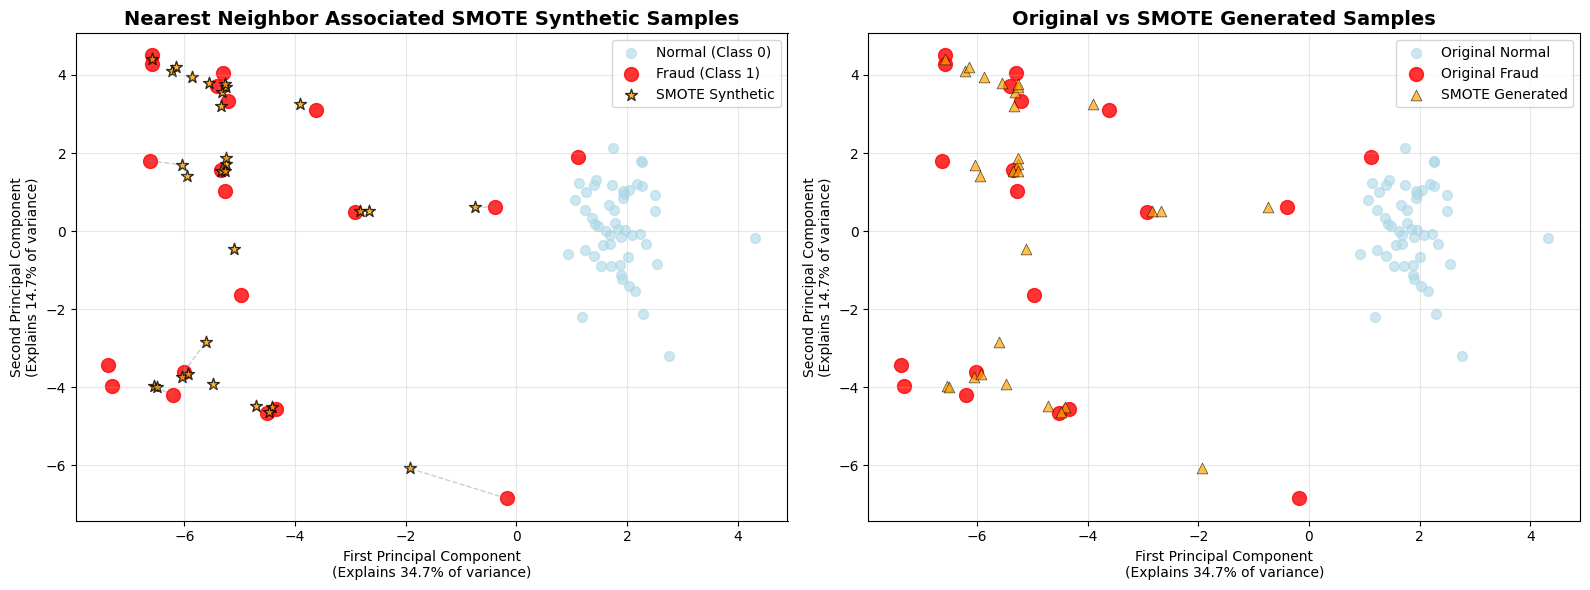

=== SMOTE DEMONSTRATION ===
Original fraud samples: 20
SMOTE synthetic samples created: 30
Total samples after SMOTE: 100

=== CLASS DISTRIBUTION ===
Before SMOTE:
  Normal: 50 samples
  Fraud: 20 samples
  Ratio: 2.5:1

After SMOTE:
  Normal: 50 samples
  Fraud: 50 samples
  Ratio: 1.0:1


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

# Load the credit card fraud dataset
df = pd.read_csv('creditcard.csv')

# Prepare the data
X = df.drop('Class', axis=1)
y = df['Class']

# Take a small sample for visualization
fraud_indices = df[df['Class'] == 1].index[:20]  # 20 fraud cases
normal_indices = df[df['Class'] == 0].sample(50, random_state=42).index  # 50 normal cases

sample_indices = np.concatenate([fraud_indices, normal_indices])
X_sample = X.loc[sample_indices]
y_sample = y.loc[sample_indices]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Apply SMOTE ONCE and use the results for both plots
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_pca, y_sample)

# Extract the SMOTE-generated samples
original_length = len(X_pca)
smote_samples = X_resampled[original_length:]  # These are the synthetic samples
smote_labels = y_resampled[original_length:]   # Should all be 1 (fraud)

# Get minority class samples for line segment demonstration
minority_mask = y_sample == 1
minority_samples = X_pca[minority_mask]

def demonstrate_actual_smote_segments(original_minority, synthetic_samples, k_neighbors=3):
    """
    Show which synthetic samples correspond to which original samples
    by finding the closest original sample for each synthetic sample
    """
    # For each synthetic sample, find its closest original minority sample
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(original_minority)
    
    line_segments = []
    
    # Limit visualization to first 10 synthetic samples for clarity
    for synthetic in synthetic_samples[:10]:
        # Find closest original sample
        distances, indices = nn.kneighbors([synthetic])
        closest_original = original_minority[indices[0][0]]
        
        line_segments.append([closest_original, synthetic])
    
    return line_segments

# Get line segments connecting original samples to their synthetic counterparts
line_segments = demonstrate_actual_smote_segments(minority_samples, smote_samples)

# Create the visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Original data with actual SMOTE synthetic samples and line segments
scatter1 = ax1.scatter(X_pca[y_sample == 0, 0], X_pca[y_sample == 0, 1], 
                      c='lightblue', alpha=0.6, s=50, label='Normal (Class 0)')
scatter2 = ax1.scatter(X_pca[y_sample == 1, 0], X_pca[y_sample == 1, 1], 
                      c='red', alpha=0.8, s=100, label='Fraud (Class 1)')

# Draw line segments to show relationship (approximate)
for i, (original, synthetic) in enumerate(line_segments):
    ax1.plot([original[0], synthetic[0]], [original[1], synthetic[1]], 
             'gray', alpha=0.4, linewidth=1, linestyle='--')

# Plot the actual SMOTE synthetic samples
ax1.scatter(smote_samples[:, 0], smote_samples[:, 1], 
           c='orange', alpha=0.8, s=80, marker='*', 
           edgecolors='black', linewidth=1, label='SMOTE Synthetic')

ax1.set_title('Nearest Neighbor Associated SMOTE Synthetic Samples', fontsize=14, fontweight='bold')
ax1.set_xlabel(f'First Principal Component\n(Explains {pca.explained_variance_ratio_[0]:.1%} of variance)')
ax1.set_ylabel(f'Second Principal Component\n(Explains {pca.explained_variance_ratio_[1]:.1%} of variance)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Same data showing the complete picture
ax2.scatter(X_pca[y_sample == 0, 0], X_pca[y_sample == 0, 1], 
           c='lightblue', alpha=0.6, s=50, label='Original Normal')
ax2.scatter(X_pca[y_sample == 1, 0], X_pca[y_sample == 1, 1], 
           c='red', alpha=0.8, s=100, label='Original Fraud')

# Plot the same SMOTE generated samples (should match the stars in plot 1)
ax2.scatter(smote_samples[:, 0], smote_samples[:, 1], 
           c='orange', alpha=0.7, s=60, marker='^', 
           label='SMOTE Generated', edgecolors='black', linewidth=0.5)

ax2.set_title('Original vs SMOTE Generated Samples', fontsize=14, fontweight='bold')
ax2.set_xlabel(f'First Principal Component\n(Explains {pca.explained_variance_ratio_[0]:.1%} of variance)')
ax2.set_ylabel(f'Second Principal Component\n(Explains {pca.explained_variance_ratio_[1]:.1%} of variance)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Enhanced explanation
print("=== SMOTE DEMONSTRATION ===")
print(f"Original fraud samples: {len(minority_samples)}")
print(f"SMOTE synthetic samples created: {len(smote_samples)}")
print(f"Total samples after SMOTE: {len(X_resampled)}")

print("\n=== CLASS DISTRIBUTION ===")
print("Before SMOTE:")
print(f"  Normal: {sum(y_sample == 0)} samples")
print(f"  Fraud: {sum(y_sample == 1)} samples")
print(f"  Ratio: {sum(y_sample == 0) / sum(y_sample == 1):.1f}:1")

print("\nAfter SMOTE:")
print(f"  Normal: {sum(y_resampled == 0)} samples")
print(f"  Fraud: {sum(y_resampled == 1)} samples")
print(f"  Ratio: {sum(y_resampled == 0) / sum(y_resampled == 1):.1f}:1")


Features to analyze: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
Excluded features: Time, Amount


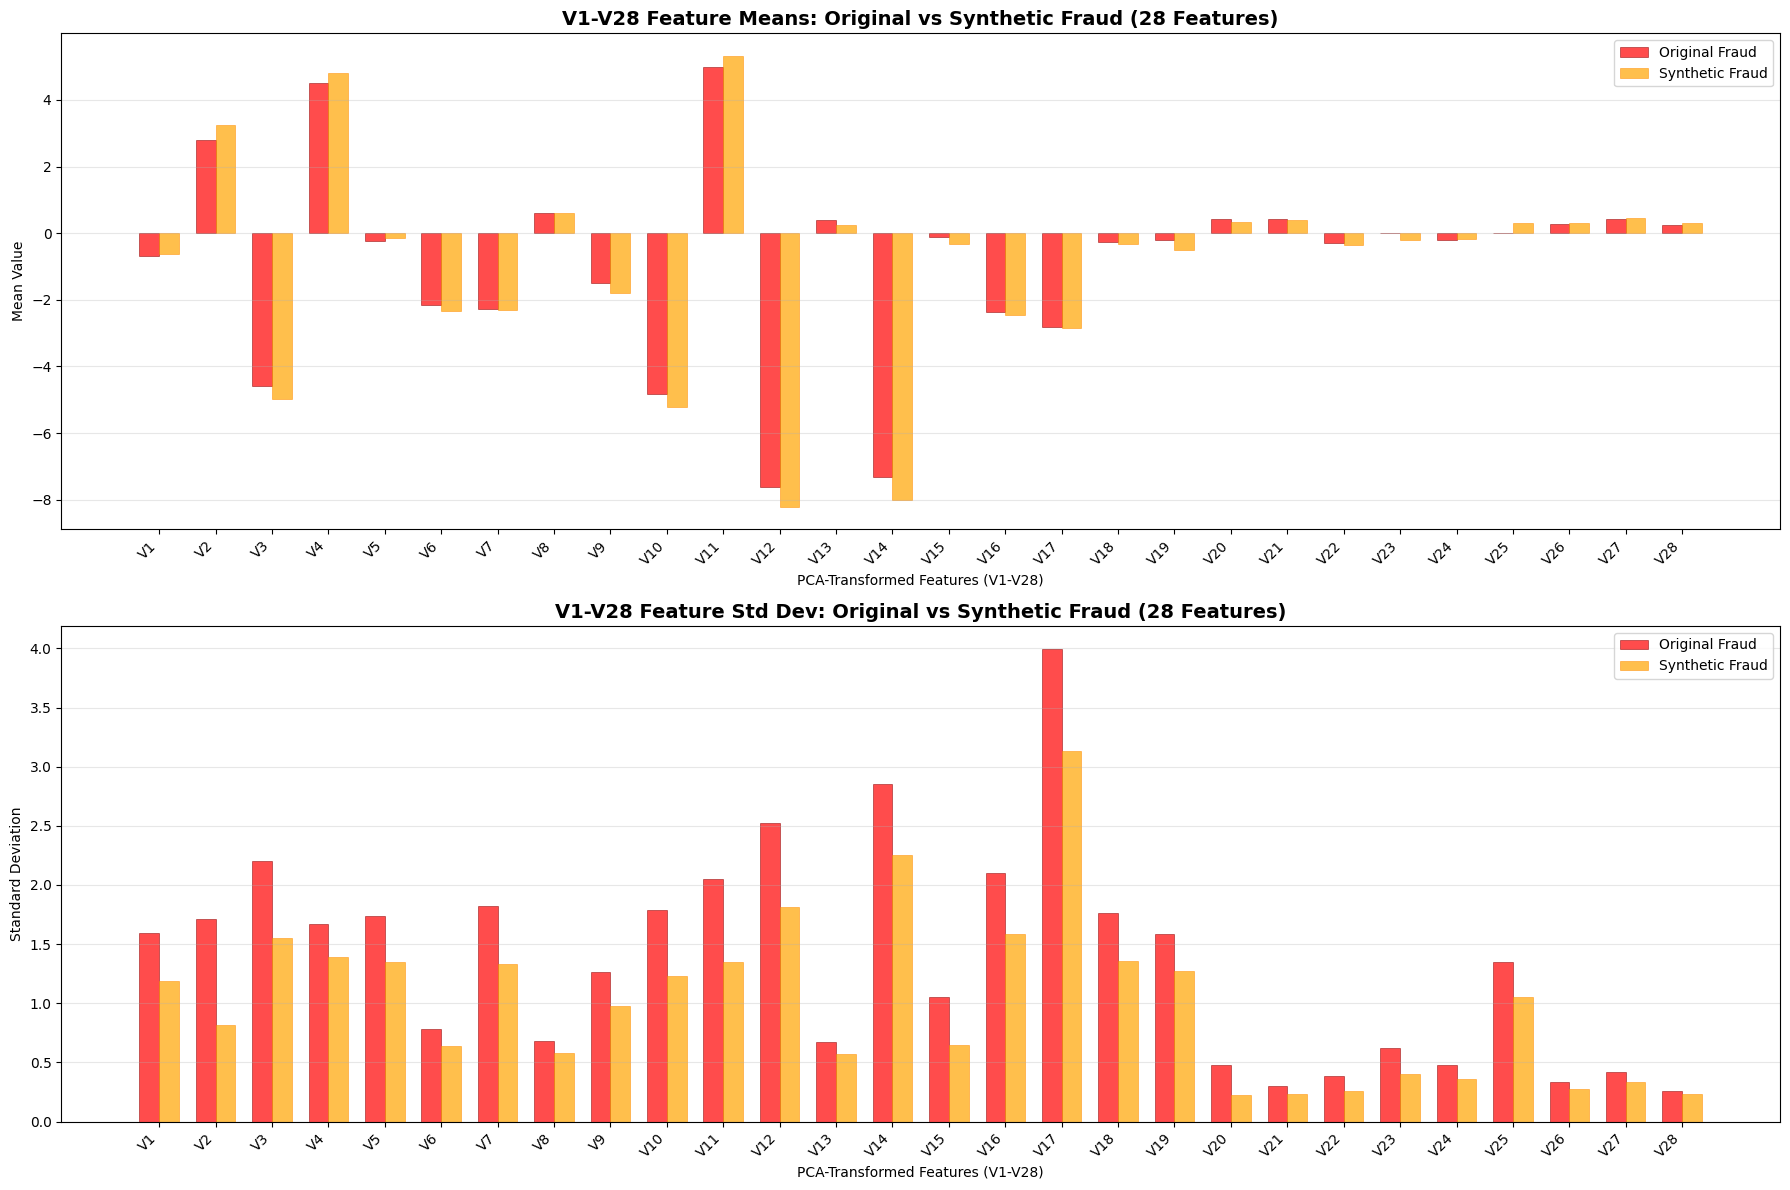

=== V1-V28 FEATURES STATISTICS ANALYSIS ===
Features analyzed: 28 (V1-V28)
Features excluded: Time, Amount
Original fraud samples: 20
Synthetic fraud samples: 30

V1-V28 feature names: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

=== TOP 5 FEATURES WITH LARGEST DIFFERENCES ===
Largest MEAN differences:
  V14: Original=-7.3060, Synthetic=-8.0206, Diff=0.7145
  V12: Original=-7.6222, Synthetic=-8.2018, Diff=0.5796
  V2: Original=2.8113, Synthetic=3.2466, Diff=0.4354
  V10: Original=-4.8290, Synthetic=-5.2241, Diff=0.3950
  V3: Original=-4.5798, Synthetic=-4.9639, Diff=0.3841

Largest STD DEV differences:
  V2: Original=1.7124, Synthetic=0.8127, Diff=0.8996
  V17: Original=3.9913, Synthetic=3.1306, Diff=0.8606
  V12: Original=2.5273, Synthetic=1.8131, Diff=0.7142
  V11: Original=2.0488, Synthetic=1.3462, Diff=0.7026
  V3: Original=2.2002, Syntheti

/tmp/ipykernel_4983/1303311040.py:113: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Diff={mean_diffs[idx]:.4f}")
/tmp/ipykernel_4983/1303311040.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Diff={std_diffs[idx]:.4f}")
/tmp/ipykernel_4983/1303311040.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Diff={mean_diffs[idx]:.4f}")
/tmp/ipykernel_4983/1303311040.py:135: FutureWarning: Series.__getitem__ treating keys as

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

# Load the credit card fraud dataset
df = pd.read_csv('creditcard.csv')

# Prepare the data
X = df.drop('Class', axis=1)
y = df['Class']

# Take a sample for visualization
fraud_indices = df[df['Class'] == 1].index[:20]  # 20 fraud cases
normal_indices = df[df['Class'] == 0].sample(50, random_state=42).index  # 50 normal cases

sample_indices = np.concatenate([fraud_indices, normal_indices])
X_sample = X.loc[sample_indices]
y_sample = y.loc[sample_indices]

# Apply SMOTE directly to the original features (no PCA transformation)
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_sample, y_sample)

# Separate original and synthetic samples
original_fraud = X_sample[y_sample == 1]
synthetic_fraud = X_resampled[len(X_sample):]  # Synthetic samples are after original samples

# Get feature names and exclude Time and Amount
all_feature_names = X.columns.tolist()
feature_names = [f for f in all_feature_names if f not in ['Time', 'Amount']]

print(f"Features to analyze: {feature_names}")
print(f"Excluded features: Time, Amount")

# Select only the V1-V28 features for analysis
original_fraud_filtered = original_fraud[feature_names]
synthetic_fraud_filtered = synthetic_fraud[feature_names]

# Calculate statistics for all original features
def calculate_all_feature_stats(data):
    """Calculate mean and std for all features"""
    means = data.mean(axis=0)
    stds = data.std(axis=0)
    return means, stds

# Calculate statistics
original_means, original_stds = calculate_all_feature_stats(original_fraud_filtered)
synthetic_means, synthetic_stds = calculate_all_feature_stats(synthetic_fraud_filtered)

# Create visualization for all original features
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# Plot 1: Mean comparison for all original features
x_pos = np.arange(len(feature_names))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, original_means, width, 
                label='Original Fraud', color='red', alpha=0.7, edgecolor='darkred', linewidth=0.5)
bars2 = ax1.bar(x_pos + width/2, synthetic_means, width, 
                label='Synthetic Fraud', color='orange', alpha=0.7, edgecolor='darkorange', linewidth=0.5)

ax1.set_title(f'V1-V28 Feature Means: Original vs Synthetic Fraud ({len(feature_names)} Features)', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('PCA-Transformed Features (V1-V28)')
ax1.set_ylabel('Mean Value')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(feature_names, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Standard deviation comparison for all original features
bars3 = ax2.bar(x_pos - width/2, original_stds, width, 
                label='Original Fraud', color='red', alpha=0.7, edgecolor='darkred', linewidth=0.5)
bars4 = ax2.bar(x_pos + width/2, synthetic_stds, width, 
                label='Synthetic Fraud', color='orange', alpha=0.7, edgecolor='darkorange', linewidth=0.5)

ax2.set_title(f'V1-V28 Feature Std Dev: Original vs Synthetic Fraud ({len(feature_names)} Features)', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel('PCA-Transformed Features (V1-V28)')
ax2.set_ylabel('Standard Deviation')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(feature_names, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("=== V1-V28 FEATURES STATISTICS ANALYSIS ===")
print(f"Features analyzed: {len(feature_names)} (V1-V28)")
print(f"Features excluded: Time, Amount")
print(f"Original fraud samples: {len(original_fraud)}")
print(f"Synthetic fraud samples: {len(synthetic_fraud)}")

print(f"\nV1-V28 feature names: {feature_names}")

# Calculate differences for all features
mean_diffs = np.abs(synthetic_means - original_means)
std_diffs = np.abs(synthetic_stds - original_stds)

print("\n=== TOP 5 FEATURES WITH LARGEST DIFFERENCES ===")
print("Largest MEAN differences:")
top_mean_indices = np.argsort(mean_diffs)[-5:][::-1]
for i, idx in enumerate(top_mean_indices):
    feature_name = feature_names[idx]
    print(f"  {feature_name}: Original={original_means.iloc[idx]:.4f}, Synthetic={synthetic_means.iloc[idx]:.4f}, "
          f"Diff={mean_diffs[idx]:.4f}")

print("\nLargest STD DEV differences:")
top_std_indices = np.argsort(std_diffs)[-5:][::-1]
for i, idx in enumerate(top_std_indices):
    feature_name = feature_names[idx]
    print(f"  {feature_name}: Original={original_stds.iloc[idx]:.4f}, Synthetic={synthetic_stds.iloc[idx]:.4f}, "
          f"Diff={std_diffs[idx]:.4f}")

print("\n=== FEATURES WITH SMALLEST DIFFERENCES (BEST PRESERVED) ===")
print("Smallest MEAN differences:")
best_mean_indices = np.argsort(mean_diffs)[:5]
for i, idx in enumerate(best_mean_indices):
    feature_name = feature_names[idx]
    print(f"  {feature_name}: Original={original_means.iloc[idx]:.4f}, Synthetic={synthetic_means.iloc[idx]:.4f}, "
          f"Diff={mean_diffs[idx]:.4f}")

print("\nSmallest STD DEV differences:")
best_std_indices = np.argsort(std_diffs)[:5]
for i, idx in enumerate(best_std_indices):
    feature_name = feature_names[idx]
    print(f"  {feature_name}: Original={original_stds.iloc[idx]:.4f}, Synthetic={synthetic_stds.iloc[idx]:.4f}, "
          f"Diff={std_diffs[idx]:.4f}")

print("\n=== OVERALL PRESERVATION QUALITY ===")
avg_mean_diff = np.mean(mean_diffs)
avg_std_diff = np.mean(std_diffs)
max_mean_diff = np.max(mean_diffs)
max_std_diff = np.max(std_diffs)

print(f"Average Mean Difference: {avg_mean_diff:.4f}")
print(f"Average Std Difference: {avg_std_diff:.4f}")
print(f"Maximum Mean Difference: {max_mean_diff:.4f}")
print(f"Maximum Std Difference: {max_std_diff:.4f}")

# Calculate preservation scores
mean_preservation = max(0, 1 - avg_mean_diff)
std_preservation = max(0, 1 - avg_std_diff)

print(f"\nPreservation Scores:")
print(f"  Mean Preservation: {mean_preservation:.1%}")
print(f"  Variability Preservation: {std_preservation:.1%}")
print(f"  Overall Preservation: {(mean_preservation + std_preservation) / 2:.1%}")

print("\n=== INTERPRETATION ===")
if avg_mean_diff < 0.1:
    print("✅ SMOTE preserves mean values excellently across V1-V28 features")
elif avg_mean_diff < 0.5:
    print("✅ SMOTE preserves mean values well across V1-V28 features")
else:
    print("⚠️ SMOTE shows notable differences in mean values for some V1-V28 features")

if avg_std_diff < 0.1:
    print("✅ SMOTE preserves variability excellently across V1-V28 features")
elif avg_std_diff < 0.5:
    print("✅ SMOTE preserves variability well across V1-V28 features")
else:
    print("⚠️ SMOTE shows notable differences in variability for some V1-V28 features")

# Correlation analysis
mean_correlation = np.corrcoef(original_means, synthetic_means)[0, 1]
std_correlation = np.corrcoef(original_stds, synthetic_stds)[0, 1]

print(f"\n=== CORRELATION ANALYSIS ===")
print(f"Mean correlation (Original vs Synthetic): {mean_correlation:.4f}")
print(f"Std correlation (Original vs Synthetic): {std_correlation:.4f}")

In [10]:
# Imbalanced-Learn Methods Demo
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.1, 0.9], 
                          n_informative=3, n_redundant=1, random_state=42)
print(f"Original: {Counter(y)}")

# Oversampling Methods
methods = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    
    # Undersampling Methods
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'NearMiss': NearMiss(version=1, n_neighbors=3),
    'TomekLinks': TomekLinks(),
    'EditedNearestNeighbours': EditedNearestNeighbours(),
    
    # Combination Methods
    'SMOTEENN': SMOTEENN(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42)
}

# Apply each method and show results
for name, sampler in methods.items():
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    print(f"{name:20}: {Counter(y_resampled)}")

Original: Counter({np.int64(1): 893, np.int64(0): 107})
SMOTE               : Counter({np.int64(1): 893, np.int64(0): 893})
ADASYN              : Counter({np.int64(0): 900, np.int64(1): 893})
BorderlineSMOTE     : Counter({np.int64(1): 893, np.int64(0): 893})
SVMSMOTE            : Counter({np.int64(1): 893, np.int64(0): 893})
RandomOverSampler   : Counter({np.int64(1): 893, np.int64(0): 893})
RandomUnderSampler  : Counter({np.int64(0): 107, np.int64(1): 107})
NearMiss            : Counter({np.int64(0): 107, np.int64(1): 107})
TomekLinks          : Counter({np.int64(1): 886, np.int64(0): 107})
EditedNearestNeighbours: Counter({np.int64(1): 796, np.int64(0): 107})
SMOTEENN            : Counter({np.int64(0): 892, np.int64(1): 672})
SMOTETomek          : Counter({np.int64(1): 893, np.int64(0): 893})
